In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures

In [2]:
df = pd.read_excel('../merged_data.xlsx')
df

,Red,Green,Blue,superficie_totale_drainee,agricole,forestier,humide,aquatique,anthropique,coupe_regenaration,...,p_t_per,ph,pheo,ss,temp,turb,durete,iqbp6,latitude,longitude
0,0.266133,0.338741,0.395126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.329250,NaN,3.015000,814.750000,NaN,NaN,NaN,50.500000,46.749694,-71.299333
1,0.230186,0.370447,0.399367,705.492,0.05,96.21,0.71,0.41,0.28,2.27,...,0.003000,8.225000,0.097500,1.250000,14.500000,1.100000,NaN,95.000000,48.408981,-64.516755
2,0.239546,0.366269,0.394185,248.312,0.05,89.15,0.49,0.59,0.86,8.85,...,0.002250,8.175000,0.232500,2.625000,15.000000,1.000000,NaN,88.000000,48.386735,-64.601016
3,0.218447,0.370770,0.410784,99.322,6.15,74.59,10.43,1.24,4.54,3.05,...,0.004250,8.125000,0.702500,3.500000,13.250000,1.475000,NaN,88.250000,48.062150,-65.164711
4,0.242465,0.364553,0.392982,NaN,0.18,91.07,1.88,0.52,0.09,6.08,...,0.002333,8.133333,0.116667,1.500000,13.333333,1.000000,NaN,96.333333,48.086762,-65.447414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.291763,0.340796,0.367441,NaN,5.85,42.51,30.47,9.63,3.42,7.88,...,0.032471,7.200000,1.370000,11.352941,17.692308,21.562500,25.907692,60.882353,48.560392,-78.114931
503,0.254787,0.365533,0.379680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.130562,NaN,NaN,43.187500,NaN,NaN,NaN,14.750000,48.454972,-78.038583
504,0.259204,0.359909,0.380888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.096130,7.700000,9.442857,20.804348,19.652632,52.030435,72.453333,8.956522,48.659443,-79.227044
505,0.256408,0.364179,0.379413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.067909,7.522727,2.980000,14.386364,19.766667,47.000000,53.726667,35.181818,48.749029,-79.228012


In [3]:
df.columns

Index(['Red', 'Green', 'Blue', 'superficie_totale_drainee', 'agricole',
       'forestier', 'humide', 'aquatique', 'anthropique', 'coupe_regenaration',
       'sol_nu', 'non_classifie', 'cat', 'cf', 'chl_aa', 'cod', 'cond', 'mg',
       'nh3', 'nox', 'ntot', 'p_t_per', 'ph', 'pheo', 'ss', 'temp', 'turb',
       'durete', 'iqbp6', 'latitude', 'longitude'],
      dtype='object')

In [31]:
df.dropna()

,Red,Green,Blue,superficie_totale_drainee,agricole,forestier,humide,aquatique,anthropique,coupe_regenaration,...,p_t_per,ph,pheo,ss,temp,turb,durete,iqbp6,latitude,longitude
7,0.236677,0.363164,0.400159,325.995,0.24,94.06,0.41,0.21,0.59,4.50,...,0.002303,8.112121,0.305172,2.106061,12.293333,1.312121,83.325000,92.606061,48.126467,-66.468117
8,0.283264,0.339041,0.377695,565.644,15.14,63.48,7.28,7.93,2.31,3.85,...,0.007083,8.100000,0.684375,2.388889,16.394118,1.650000,92.175000,82.944444,48.463999,-67.429503
10,0.282846,0.339616,0.377538,456.652,16.87,68.86,5.96,1.17,1.96,5.16,...,0.005306,8.158333,0.703750,2.666667,14.650000,1.438889,99.325000,82.250000,48.462613,-67.430269
14,0.225026,0.366269,0.408705,258.525,4.35,82.01,3.12,4.61,2.56,3.35,...,0.005158,7.836842,0.640667,1.736842,18.312500,1.126316,54.850000,85.000000,47.578738,-68.921726
15,0.275870,0.338291,0.385839,323.355,6.05,80.42,3.56,3.87,2.90,3.19,...,0.032250,7.950000,1.131250,4.800000,19.929412,4.135000,66.733333,69.450000,47.676496,-68.875398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.263181,0.363113,0.373706,217.504,36.72,25.79,27.83,2.79,3.21,3.12,...,0.036880,7.520000,1.734167,18.640000,13.536842,9.472000,28.646154,45.040000,48.642188,-71.670950
475,0.233956,0.345644,0.420400,424.771,13.61,56.85,19.64,3.17,2.14,4.15,...,0.035667,7.525926,1.864167,14.537037,16.460870,10.237037,25.053333,60.370370,48.478756,-71.313556
485,0.270539,0.342693,0.386768,803.085,0.33,80.16,3.73,7.55,0.79,6.84,...,0.004207,7.122414,0.286667,1.672414,17.409259,1.210345,8.213636,94.931034,48.344670,-69.408570
492,0.236798,0.358321,0.404881,115.937,16.26,71.08,2.52,2.72,3.92,3.31,...,0.037500,7.708621,1.440000,15.741379,15.268519,12.582759,45.950000,60.086207,48.187857,-69.698605


In [ ]:
0.68

In [43]:
target = 'cod'
data2 = df.copy()
data2 = data2.drop(columns=['cat', 'cf', 'chl_aa', 'cond', 'mg',
       'nh3', 'nox', 'ntot', 'p_t_per', 'ph', 'pheo', 'ss', 'temp', 'turb',
       'durete', 'iqbp6', 'latitude', 'longitude'])
# data2 = data2.dropna(subset=[target])
data2 = data2.dropna()
data2

,Red,Green,Blue,superficie_totale_drainee,agricole,forestier,humide,aquatique,anthropique,coupe_regenaration,sol_nu,non_classifie,cod
1,0.230186,0.370447,0.399367,705.492,0.05,96.21,0.71,0.41,0.28,2.27,0.06,0.00,1.250000
2,0.239546,0.366269,0.394185,248.312,0.05,89.15,0.49,0.59,0.86,8.85,0.01,0.01,1.100000
3,0.218447,0.370770,0.410784,99.322,6.15,74.59,10.43,1.24,4.54,3.05,0.00,0.00,2.500000
7,0.236677,0.363164,0.400159,325.995,0.24,94.06,0.41,0.21,0.59,4.50,0.00,0.00,0.766667
8,0.283264,0.339041,0.377695,565.644,15.14,63.48,7.28,7.93,2.31,3.85,0.00,0.00,4.258333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.270539,0.342693,0.386768,803.085,0.33,80.16,3.73,7.55,0.79,6.84,0.57,0.03,4.146552
492,0.236798,0.358321,0.404881,115.937,16.26,71.08,2.52,2.72,3.92,3.31,0.17,0.02,3.982759
498,0.247511,0.355688,0.396801,170.611,0.00,47.96,30.71,3.05,1.82,16.45,0.00,0.00,22.295238
499,0.228961,0.360331,0.410708,366.375,0.00,38.42,36.30,8.95,2.68,13.62,0.03,0.00,18.304762


In [44]:
seed = np.random.seed(2024)
train_data, val_data = train_test_split(data2, test_size=0.25, random_state=seed)

In [45]:
train_data

,Red,Green,Blue,superficie_totale_drainee,agricole,forestier,humide,aquatique,anthropique,coupe_regenaration,sol_nu,non_classifie,cod
8,0.283264,0.339041,0.377695,565.644,15.14,63.48,7.28,7.93,2.31,3.85,0.00,0.00,4.258333
9,0.248626,0.356017,0.395356,39.028,23.37,62.91,3.08,1.84,4.19,4.60,0.00,0.01,6.208571
34,0.271509,0.352941,0.375550,453.918,23.26,59.81,8.86,1.02,5.58,1.41,0.05,0.00,6.637931
204,0.276549,0.336626,0.386825,94.693,74.22,3.81,1.98,0.10,19.87,0.02,0.00,0.00,6.041379
178,0.237510,0.367158,0.395332,146.191,16.04,73.55,4.58,0.58,4.83,0.43,0.00,0.00,3.164286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.231234,0.371915,0.396851,634.524,19.34,61.98,4.55,2.47,9.79,1.79,0.07,0.00,6.342308
67,0.245192,0.368698,0.386110,732.570,32.12,59.09,3.83,0.40,3.40,1.16,0.00,0.00,6.573333
362,0.308568,0.327285,0.364147,526.680,5.68,55.93,5.67,2.18,28.80,1.74,0.00,0.01,5.417544
217,0.231898,0.365037,0.403065,112.152,35.90,56.78,3.30,1.83,2.20,0.00,0.00,0.00,6.394545


In [46]:
val_data

,Red,Green,Blue,superficie_totale_drainee,agricole,forestier,humide,aquatique,anthropique,coupe_regenaration,sol_nu,non_classifie,cod
430,0.265981,0.353898,0.380122,263.220,20.79,63.84,4.72,3.37,5.50,1.75,0.00,0.03,4.512903
243,0.239319,0.363090,0.397591,142.330,76.73,15.70,4.08,0.10,3.23,0.15,0.00,0.00,5.085714
102,0.239766,0.355083,0.405151,84.679,18.29,51.46,19.85,0.31,9.13,0.96,0.00,0.01,10.070000
326,0.251072,0.363639,0.385289,219.389,20.18,67.07,4.93,5.32,1.46,1.02,0.00,0.02,5.364706
465,0.276688,0.352109,0.371203,125.375,35.60,22.49,38.10,0.78,0.84,2.05,0.13,0.00,19.053333
126,0.261807,0.346391,0.391801,274.739,44.03,31.47,11.13,0.15,12.26,0.96,0.00,0.00,8.851064
38,0.237591,0.365362,0.397047,489.592,2.08,84.01,7.88,0.91,0.38,4.68,0.06,0.00,6.405263
145,0.265628,0.353780,0.380592,161.915,80.57,11.58,4.44,0.30,3.02,0.09,0.00,0.00,10.505263
500,0.251244,0.356411,0.392345,676.583,1.69,36.46,37.42,6.17,4.39,13.74,0.12,0.00,16.971429
256,0.249721,0.353845,0.396435,279.735,4.38,76.74,6.79,10.45,1.10,0.48,0.01,0.05,4.062069


In [47]:
# Run optimized model on the training dataset
rf_train = RandomForestRegressor(n_estimators=1000, max_features=5, random_state=seed)
rf_train.fit(train_data.drop(columns=target), train_data[target])

RandomForestRegressor(max_features=5, n_estimators=1000)

In [51]:
# Run optimized model on the full dataset
rf_test = rf_train.predict(val_data.drop(columns=target))
r2 = round(r2_score(val_data[target], rf_test), 4)
r2

0.5342

In [55]:
vars.index

Index(['non_classifie', 'sol_nu', 'anthropique', 'Blue',
       'superficie_totale_drainee', 'Red', 'Green', 'aquatique',
       'coupe_regenaration', 'agricole', 'forestier', 'humide'],
      dtype='object')

In [59]:
vars

non_classifie                 0.640680
sol_nu                        2.842231
anthropique                   3.196128
Blue                          3.203082
superficie_totale_drainee     3.879906
Red                           4.378782
Green                         4.768828
aquatique                     7.583940
coupe_regenaration            8.517330
agricole                      9.284315
forestier                     9.833816
humide                       41.870961
dtype: float64

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

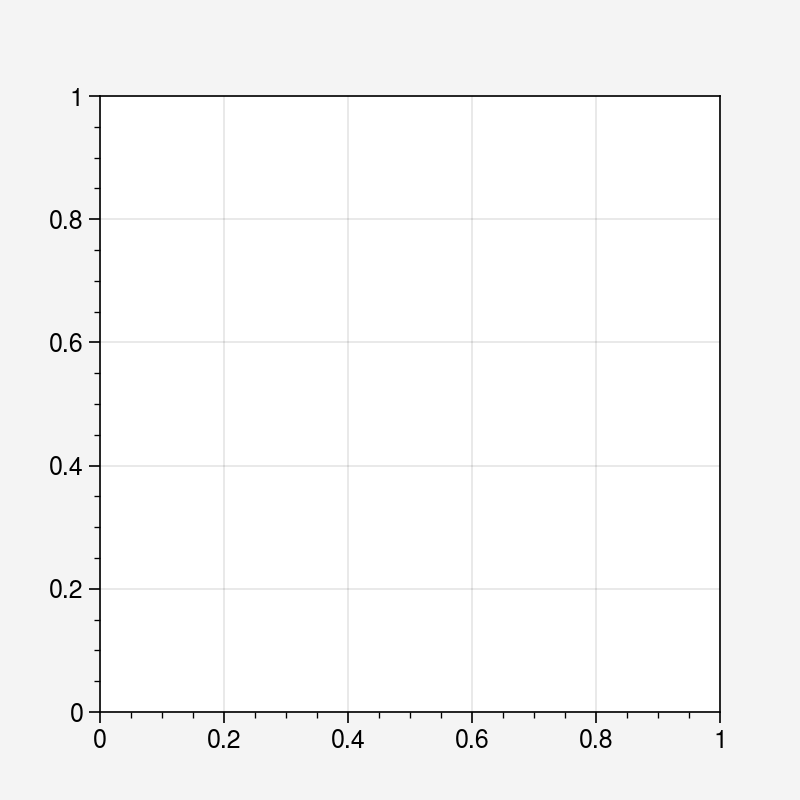

In [58]:
# Variable importance
vars = pd.Series(rf_train.feature_importances_, index=train_data.drop(columns=target).columns)
vars = (vars / vars.sum()) * 100
vars = vars.sort_values()
plt.barh(vars, 1, color="royalblue3", edgecolor="black")
plt.xlabel('Relative Influence (%)')
plt.title(r'$R^2$ (pred vs. obs): ' + str(r2))
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), frameon=False)
plt.xlabel('Relative Influence (%)')
plt.show()